In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

## Import MNIST Dataset provided by TensorFlow

In [2]:
from tensorflow.keras import datasets

In [3]:
mnist = datasets.mnist

In [4]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [24]:
train_x.shape

(60000, 28, 28)

## Visualize Dataset

In [7]:
image = train_x[0]
image.shape

(28, 28)

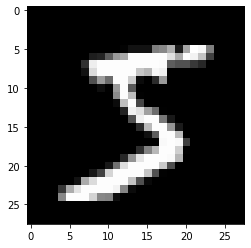

In [8]:
plt.imshow(image, 'gray')
plt.show()

## Channel of dataset
* 1 : grayscale
* 3 : rgb

In [9]:
train_x.shape

(60000, 28, 28)

## Expand Dimension
* [Batch, Height, Width, Channel]

In [11]:
# use numpy expand_dims()
expanded_data_1 = np.expand_dims(train_x, -1) # -1 is back
expanded_data_1.shape

(60000, 28, 28, 1)

In [12]:
# use tensorflow exapnd_dims()
expanded_data_2 = tf.expand_dims(train_x, -1)
expanded_data_2.shape

TensorShape([60000, 28, 28, 1])

In [18]:
# use tensorflow newaxis()
train_x[..., tf.newaxis].shape

(60000, 28, 28, 1)

In [26]:
# use numpy reshape()
expanded_data_3 = train_x.reshape([60000, 28, 28, 1])
expanded_data_3.shape

(60000, 28, 28, 1)

## Visualize Dataset 2
* dimension issue in matplotlib

In [27]:
new_train_x = train_x[..., tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1)

In [30]:
image = new_train_x[0]
image.shape
# shape is (28, 28, 1) -> invalid shape in case using matplotlib.pyplot.plot() for 'gray' 

(28, 28, 1)

In [32]:
# need to squeeze
# (28, 28, 1) -> (28, 28)
image = np.squeeze(new_train_x[0])
image.shape

(28, 28)

[]

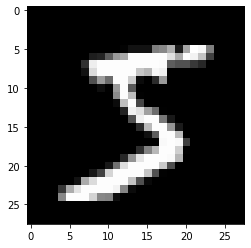

In [33]:
plt.imshow(image, 'gray')
plt.plot()

## Label

In [34]:
train_y.shape

(60000,)

In [35]:
train_y[0]

5

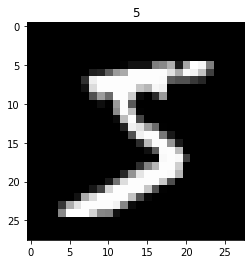

In [36]:
plt.title(train_y[0])
plt.imshow(train_x[0], 'gray')
plt.show()

## One-Hot Encoding
```python3
    tensorflow.keras.utils.to_categorical
    
```

In [39]:
tf.keras.utils.to_categorical(train_y[0], 10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [40]:
label = train_y[0]
label_onehot = tf.keras.utils.to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

/Users/slidemorning/opt/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


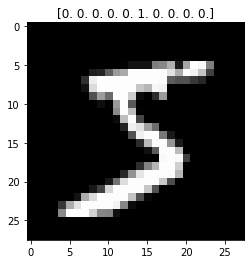

In [41]:
plt.title(label_onehot)
plt.imshow(train_x[0], 'gray')
plt.show()